# Basic Amplification

In [11]:
# import modules
import sys
sys.path.insert(1, '../src')
from MPA_model import *
import matplotlib.pyplot as plt

In [12]:
# parameters
INIT_WAVELENGTH = 800e-9 # in meter
INIT_PULSE_ENERGY = 1.2e-2 # in joule
INIT_PULSE_DURATION = 160e-12 # in seconds
INPUT_AREA = 1.8e-4 # in meter square

initial = SignalPacket(INIT_WAVELENGTH, INIT_PULSE_ENERGY, INPUT_AREA, INIT_PULSE_DURATION, 0, 0)

In [13]:
# pack time series single to signal_pile
initial_signal_pile = [[initial]]

In [14]:
# crystal parameters
CRYSTAL_ALPHA = 1e2 # attenuation in 
CRYSTAL_QD = 0.665 # quantum defect
CRYSTAL_LENGTH = 20e-3 # length in meter
CRYSTAL_N2 = 2.9e-20 # nonlinear refractive index in m^2/W
CRYSTAL_J_SAT = 0.9e4 # saturation fluence in J/m^2

# initiate crystal 1 object
crystal = Crystal(CRYSTAL_ALPHA, CRYSTAL_QD, CRYSTAL_LENGTH, CRYSTAL_N2, CRYSTAL_J_SAT)

In [15]:
# pump energy parameters
PUMP_ENERGY = 3.1 # in joule
PUMP_AREA =  2e-4 # in meter square
PUMP_ENERGY_DISTRIBUTION = 'beer'
PUMP_FRONT_PUMP = True
PUMP_BACK_PUMP = True

# initiate pump 1 object
pump = Pump(PUMP_ENERGY, PUMP_AREA)

In [16]:
# multipass amplifier (MPA) 2 parameters
MPA2_CRYSTAL_RESOLUTION = 20 # number of crystal splits
MPA2_NUMPASS = 3 # number of passes
MPA2_LOSS_PER_PATH = 0 # percent of energy loss per path

#initiate MPA 2
m = MultiPassAmplifier(crystal)
m.set_crystal_res(MPA2_CRYSTAL_RESOLUTION)
m.set_loss_per_path(MPA2_LOSS_PER_PATH)
m.clear_passes()

In [17]:
# calculate stored energy
store = m.calculate_stored_energy_from_pump(pump, PUMP_ENERGY_DISTRIBUTION, front_pump = PUMP_FRONT_PUMP, back_pump = PUMP_BACK_PUMP)

In [18]:
# amplify the signal
m.calculate_multi_pass_amplification(store, initial_signal_pile, MPA2_NUMPASS)
after_crystal_signal_pile = m.get_single_pass_output()

In [19]:
output = after_crystal_signal_pile[0][0]
print('output energy (J) : ' + str(output.E_in))

output energy (J) : 1.808508989951373


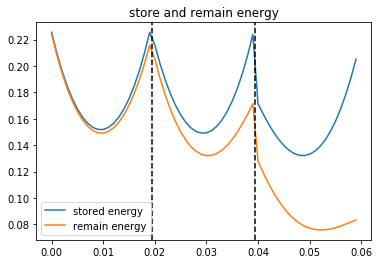

In [20]:
plt.plot(*m.plot_multi_pass_store_energy(), label = 'stored energy')
plt.plot(*m.plot_multi_pass_remain_energy(), label = 'remain energy')
for path in range(MPA2_NUMPASS - 1):
        plt.axvline(x = path*crystal.length + (1-0.5/MPA2_CRYSTAL_RESOLUTION)*crystal.length, ls = '--', c = 'black')
plt.title('store and remain energy')
plt.legend()
plt.show()